In [1]:
from IPython.display import HTML, display
from pyproj import Proj
import matplotlib.pyplot as plt
import csv
import datetime
import glob
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
utm_zone = 51
projection = Proj(proj='utm', zone=utm_zone, ellps='WGS84')

In [4]:
def latlon_to_utm(lat, lon):
    """Returns (x, y) coordinates in metres"""
    return projection(lon, lat)

In [5]:
def plot_area_scanning(file_name):
    trace = pd.read_csv(file_name)
    trace.set_index(['team','time'], inplace=True)
    teams = trace.index.levels[0].unique()
    # Display trace by team id
    fig, ax = plt.subplots(figsize=(10,10))
    for team in teams:
        trajectory_x, trajectory_y = [], []
        for time, row in trace.loc[team].iterrows():
            x, y = latlon_to_utm(row.latitude, row.longitude)
            trajectory_x.append(x)
            trajectory_y.append(y)        
        ax.plot(trajectory_x, trajectory_y, label=team)
    
    ax.legend()

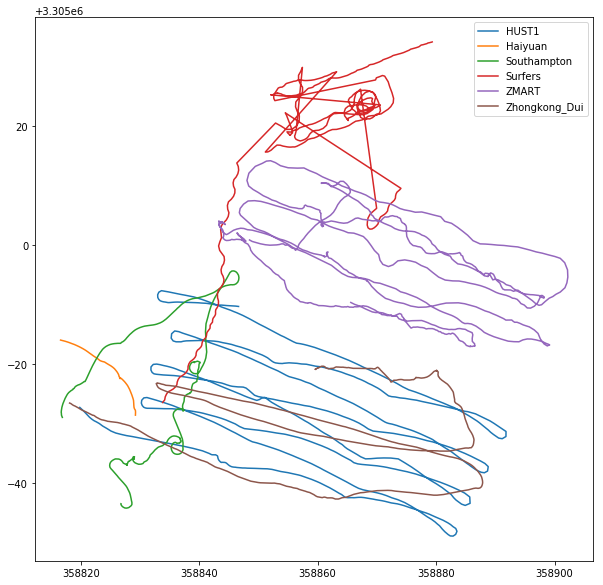

In [6]:
plot_area_scanning('./boat_traces_A.csv')

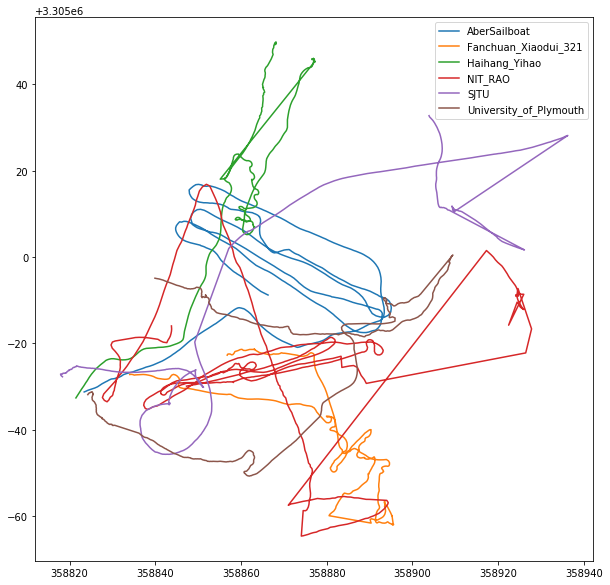

In [7]:
plot_area_scanning('./boat_traces_B.csv')

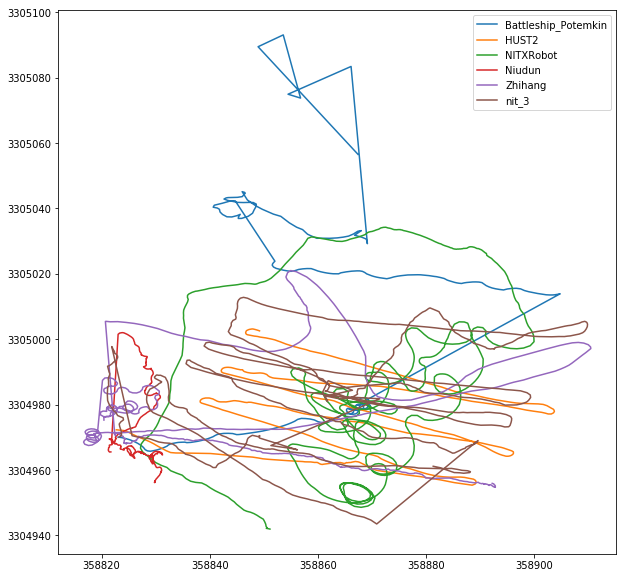

In [8]:
plot_area_scanning('./boat_traces_C.csv')